In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv(r"C:\Users\charm\OneDrive\Desktop\stockpjt\spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

In [5]:
print("Dataset Info:\n")
print(df.info())
print("\nClass Distribution:\n")
print(df['label'].value_counts())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Class Distribution:

label
ham     4825
spam     747
Name: count, dtype: int64


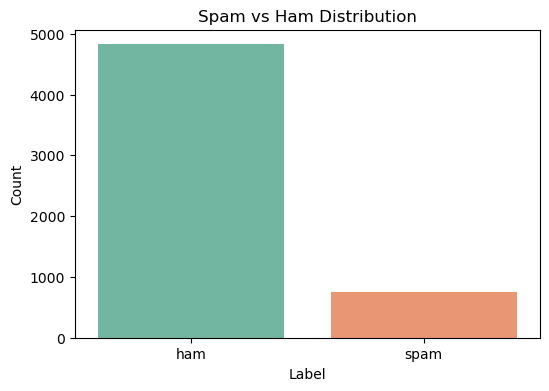

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', hue='label', palette='Set2', legend=False)
plt.title("Spam vs Ham Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


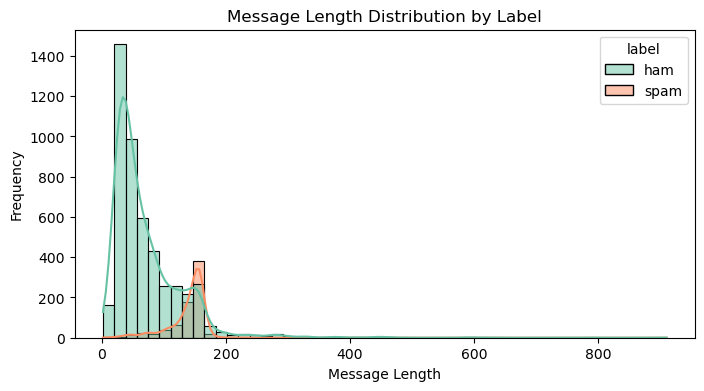

In [8]:
df['length'] = df['text'].apply(len)
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='length', hue='label', bins=50, kde=True, palette='Set2')
plt.title("Message Length Distribution by Label")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

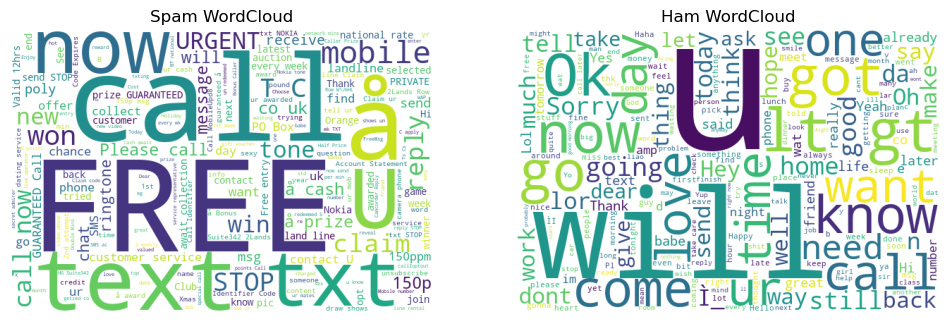

In [9]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label'] == 'spam']['text'])
ham_words = ' '.join(df[df['label'] == 'ham']['text'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Spam WordCloud")
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(spam_words))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Ham WordCloud")
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(ham_words))
plt.axis('off')
plt.show()

In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [11]:
df['clean_text'] = df['text'].apply(clean_text)

In [12]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [15]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:


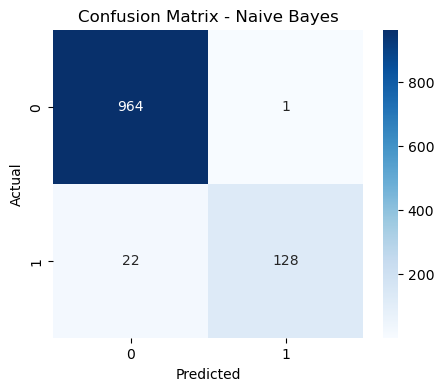

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

